In [231]:
import numpy as np
import scipy.special as special
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import reduce
from functools import partial

# **Fourier transformation**    

Decomposing waveforms...

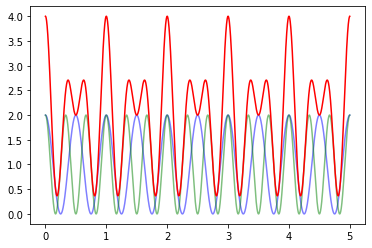

In [232]:
#addition of pure waveforms

#use the same r thoroughout to make all the fomulars fit together
T = np.arange(0,5,0.001)

A = 1 #amplitude
w = 1 #angular hz # number of crests per second
#W1 = A*np.sin(w*2*np.pi*T)

def sin_wave(A,w,t):
    return A*np.sin(w*2*np.pi*T)

def cos_wave(A,w,t):
    return A*np.cos(w*2*np.pi*T)

W1 = 1 + cos_wave(1,2,T)
W2 = 1 + cos_wave(1,3,T)

#summing waveforms
Wt = W1 + W2


fig = plt.figure()
ax = fig.add_subplot()
ax.plot(T,W1,alpha = 0.5,c = "blue")
ax.plot(T,W2, alpha = 0.5,c = "green")
ax.plot(T,Wt, c = "red")




# NOTE SOUND WAVEFORMS ARE ALWAYS >0

Deconstructing the output wave by "wrapping" it around the origin

0.009000000000000001
3.9792559056690067
0.0


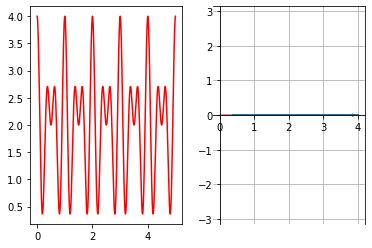

In [233]:
#need to write a simple polar to cartesian converter

#test Wt - remove later
#Wt = 1+ np.cos(3*2*np.pi*T) #MUST ALWASY BE POSITIVE
#frequency of vector rotation
V_hz = 0
theta = (2*np.pi*V_hz)*T
# length of vector
r = Wt
#print(r)


#converting polar coordinates to cartesian
def p_to_c(r,theta):
    #input = 2 vecotrs
    #output = x and y vectors
    x = np.cos(theta)*r
    y = np.sin(theta)*r

    return [x,y]

V_ = p_to_c(r,theta)



fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(T,Wt, c = "red")
#ax1.plot(T,r)
#ax1.plot(T,theta)






#plotting all the stuff
ax2 = fig.add_subplot(122)
ax2.axis("equal")
ax2.grid(True)
ax2.spines['bottom'].set_position(("data",0))
ax2.spines['left'].set_position(("data",0))
ax2.plot(V_[0],V_[1])
i = 9
print(T[i])
print(Wt[i])
print(theta[i])
ax2.quiver(V_[0][i],V_[1][i],angles = "xy", scale_units = "xy", scale = 1, color = "red")


# How can we use this to build a Hz - unmixing machine!


#image our graph has a mass to it e.g. it is a metal wire.... Then the COM of the graph will wobble aroung a bit, for most of the Hz the line is spaced out in such a way that the massess are roughly balanced adn hte COM stays close to the origin...

BUT WHEN WINDING HZ = Hz of our signal - all the peaks are on the left and troughs on the right so the COM is unusually on the right

JUST HAVE TO USE JACOBIAN?, im not exactly sure how to do this manually - lets try just multiplying each point by r to increase hte weight of further away points
*FORMAL UNDERSTANDING STILL ABOVE MY PAY GRADE - SIGH - lets try bodge it*
seems to work! **IT FUCKING WORKS!!!**
numebr of input waves controlls fidelity of plot
**doesnt work on composite waveform - because I was using the old R - nope sorry**
**MY MANUAL METHOD DOESNT LIKE NEGATIVE NUMBERS!**
**??? DONT NEED TO USE THE JACOBIAN!!!??????? Maybe he doesnt formally mean COM**

## WOrks better withouht R scaling - trace signals were due to this scaling - e.g. at Hz 1 the shape wasnt actaully balanced due tot differenting legnths but ffor the foureir it was - lead to trace singal at 1 for Hz 2 and 3

# NOT ACTUALLY COM - just a way of thinking about it, COM of points before transform

5000
5000
1.9999999999999976


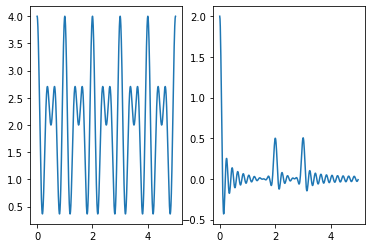

In [234]:
#COM calculation
#I know how to do it for a solid shape - integrate 
# but not sure how to do it for a line...
#makes most sense to work it out in polar coordinatres, but mass will be with respect to the arclength whereas these
# points are "evently" spaced according to theta....
# need to use the jacobian




#test Wt - remove later
#Wt = 1 + np.cos(2*2*np.pi*T) #MUST ALWASY BE POSITIVE

#now appying this to the "raw signal
Wt = W1 + W2

#basic debugging
print(len(Wt))
print(len(T))

def decompose(w,Wt):
    #decompose a waveform Wt for each Hz i
    r = Wt
    theta = w*2*np.pi*T 

    #work out x and y seperately
    Xbar = (sum(r * np.cos(theta)))/len(r)
    Ybar = (sum(r * np.sin(theta)))/len(r)

    return Xbar

def decompose_r(w,Wt):
    #decompose a waveform Wt for each Hz i
    r = Wt
    theta = w*2*np.pi*T 

    #work out x and y seperately
    Xbar = (sum(r**2 * np.cos(theta)))/len(r)
    Ybar = (sum(r**2 * np.sin(theta)))/len(r)

    return Xbar

print(decompose(0,Wt))


w = np.arange(0,5,0.01)

#partial
C = list(map(partial(decompose, Wt = Wt), w))


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(T,Wt)

ax2 = fig.add_subplot(122)
ax2.plot(w,C)








## side note about spike near 0

This spike near 0 corresponds to the fact that the whole coside wave is shifted up - so the influence of the Hz compoenent with w = 0 (flat line) = 1 :)

## Above plot = the almost fourier transform :)

    There are some slight distinctions between this plot and the actual fourier transform

# **TRANSFORM OF SUMS IS SAME AS SUM OF TRANSFORMS**

10000
10000
DECOMPOSITIONG CHECK: -4.034550471487819e-16


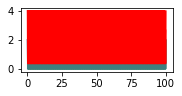

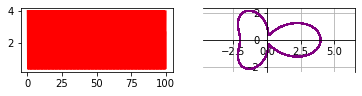

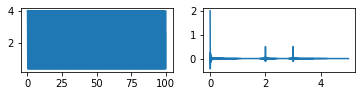

In [235]:
#putting it all in 1 place to try clarify

#addition of pure waveforms

#use the same r thoroughout to make all the fomulars fit together
T = np.arange(0,100,0.01)

def sin_wave(A,w,t):
    return A*np.sin(w*2*np.pi*T)

def cos_wave(A,w,t):
    return A*np.cos(w*2*np.pi*T)

W1 = 1+cos_wave(1,2,T)
W2 = 1 + cos_wave(1,3,T)

#summing waveforms
#Wt = W1 + W2
Wt = W1 + W2

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax1.plot(T,W1,alpha = 0.5,c = "blue")
ax1.plot(T,W2, alpha = 0.5,c = "green")
ax1.plot(T,Wt, c = "red")


#frequency of vector rotation #######################################
V_hz = 1
theta = (2*np.pi*V_hz)*T
# length of vector
r = Wt

#converting polar coordinates to cartesian
def p_to_c(r,theta):
    #input = 2 vecotrs
    #output = x and y vectors
    x = np.cos(theta)*r
    y = np.sin(theta)*r

    return [x,y]

V_ = p_to_c(r,theta)


#plotting signal again
fig = plt.figure()
ax1 = fig.add_subplot(323)
ax1.plot(T,Wt, c = "red")



#plotting the transform
ax2 = fig.add_subplot(324)
ax2.axis("equal")
ax2.grid(True)
ax2.spines['bottom'].set_position(("data",0))
ax2.spines['left'].set_position(("data",0))
#actual wrap plot
ax2.plot(V_[0],V_[1],c = "purple")

#debuggin wrap plot
# i = 9
# print(T[i])
# print(Wt[i])
# print(theta[i])
# ax2.quiver(V_[0][i],V_[1][i],angles = "xy", scale_units = "xy", scale = 1, color = "red")

#basic debugging
print(len(Wt))
print(len(T))

def decompose(w,Wt):
    #decompose a waveform Wt for each Hz i
    r = Wt
    theta = w*2*np.pi*T 

    #work out x and y seperately
    Xbar = (sum(r * np.cos(theta)))/len(r)
    Ybar = (sum(r * np.sin(theta)))/len(r)

    return Xbar

def decompose_r(w,Wt):
    #decompose a waveform Wt for each Hz i
    r = Wt
    theta = w*2*np.pi*T 

    #work out x and y seperately
    Xbar = (sum(r**2 * np.cos(theta)))/len(r)
    Ybar = (sum(r**2 * np.sin(theta)))/len(r)

    return Xbar

print("DECOMPOSITIONG CHECK:",decompose(V_hz,Wt))


#creating list of angular Hz
w = np.arange(0,5,0.001)
#applying decomposition to each angular Hz
C = list(map(partial(decompose, Wt = Wt), w))


fig = plt.figure()
ax1 = fig.add_subplot(325)
ax1.plot(T,Wt)

ax2 = fig.add_subplot(326)
ax2.plot(w,C)

# **Converting it to the analytical math**

We want to more efficiently perform this "wrapping" function - use comlpex numbers to "wrap aroung origin in complex plane

Whenever we are working with something that is 2D it is elegatn to use the complex plane, complex especially good for describinig winding and rotation compared to jsut a 2d Vector space - link to eulers formula

$e^{i\theta}$ gives the point $\theta$ radians along the unit circle

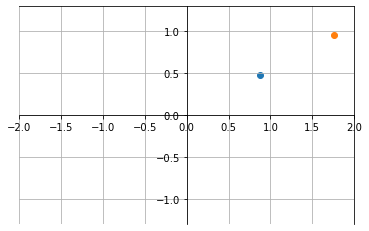

In [236]:
theta = 0.5

p = np.exp(theta*1j)
#complex number times a scalar simple scales the "vector"
p2 = 2*p

fig = plt.figure()
ax = fig.add_subplot()
ax.axis("equal")
ax.set(xlim = (-2,2), ylim = (-2,2))
ax.grid(True)
ax.spines['bottom'].set_position(("data",0))
ax.spines['left'].set_position(("data",0))
ax.scatter(p.real,p.imag)
ax.scatter(p2.real,p2.imag)




So we can simply input the theta into $e^{\theta i }$ and multiply this by Wt to get the wrapped plot

Specifically 

$e^{2\pi i t}$ described rotating at 1 revolution per second

or more generally 

$e^{2\pi i f t}$ where f is the Hz


fourier convention to clockwise so use negative exponenet

$e^{-2\pi i f t}$

Multiply this exponential by g(t) - the waveform... we get the wrapped function

$g(t) e^{-2\pi i f t}$

10000
10000


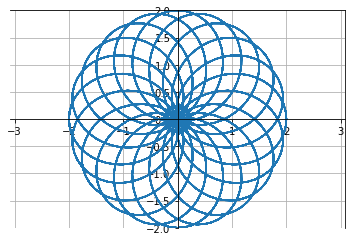

In [237]:
gt = W1

print(len(W1))
print(len(T))

f = 1.1 #angular frequency

F = gt*np.exp(-2*np.pi*f*T*1j)
F.real #this works! - python is very good with complex numbers :)

fig = plt.figure()
ax = fig.add_subplot()
ax.axis("equal")
ax.set(xlim = (-2,2), ylim = (-2,2))
ax.grid(True)
ax.spines['bottom'].set_position(("data",0))
ax.spines['left'].set_position(("data",0))
ax.plot(F.real,F.imag)

# to get COM of this new fucntion

imagine simply sampling from the original signal and taking an average

WE SAMPLE BEFORE THE POLAR TRANSFORMATION SO NO NEED TO ADJUST

Then to extend this just integrate across the interval and divide by length of interval

## Here is where the ACTUAL fourier transform is slightly different... we simply dont divide by hte interval legnth, so hte fourier transform will depend on the signal and hos look we look at it

This means that if a Hz persists... the magnitude of hte Hz after the fourier transform is scaled more and more

For other Hz (that dont make up the waveform) their scaling is canceled out by the fact that the waveform now has "Longer" to wrap around the origin and be balanced - so does not increase the size of non contributory Hz

Overall....

$F(g(t),f) = \int_T g(t) e^{-2\pi i f t} = \hat{g}(f)  $= output is 1 complex numebr giving strength of given Hz in orginial signal

#x = real component
#y = imaginary component



## Side note:

Theory of fourier transform are given with bounds of $\pm \infty$